In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("../data/train_df.csv")
test_df = pd.read_csv("../data/test_df.csv")
full_df = pd.concat([train_df, test_df])
full_df.head()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0


In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16610 entries, 0 to 1528
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   search_id   16610 non-null  int64  
 1   feature_0   16610 non-null  int64  
 2   feature_1   16610 non-null  int64  
 3   feature_2   16610 non-null  int64  
 4   feature_3   16610 non-null  int64  
 5   feature_4   16610 non-null  int64  
 6   feature_5   16610 non-null  int64  
 7   feature_6   16610 non-null  int64  
 8   feature_7   16610 non-null  int64  
 9   feature_8   16610 non-null  int64  
 10  feature_9   16610 non-null  int64  
 11  feature_10  16610 non-null  int64  
 12  feature_11  16610 non-null  int64  
 13  feature_12  16610 non-null  int64  
 14  feature_13  16610 non-null  int64  
 15  feature_14  16610 non-null  int64  
 16  feature_15  16610 non-null  int64  
 17  feature_16  16610 non-null  float64
 18  feature_17  16610 non-null  float64
 19  feature_18  16610 non-null  flo

In [4]:
# Количество пропущенных значений
full_df.isnull().sum().sum()

0

In [5]:
# Статистики по признакам
full_df.describe()

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
count,16610.000000,16610.0,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,...,16610.000000,16610.000000,16610.000000,16610.0,16610.0,16610.0,16610.000000,16610.000000,16610.000000,16610.000000
mean,256737.779049,9.0,0.192173,0.463215,0.628417,15.912583,3.874774,33.692414,1.197050,1.797532,...,0.200066,0.428609,0.097069,0.0,0.0,0.0,0.297503,0.030553,0.031224,0.021433
std,143212.155037,0.0,0.620586,1.177130,0.483242,5.315667,0.463720,11.286443,2.221115,1.893009,...,0.088575,0.248230,0.063769,0.0,0.0,0.0,0.312395,0.112889,0.115367,0.144827
min,116.000000,9.0,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,133968.000000,9.0,0.000000,0.000000,0.000000,9.000000,4.000000,26.000000,0.000000,0.000000,...,0.169314,0.255807,0.052708,0.0,0.0,0.0,0.036740,0.000000,0.000000,0.000000
50%,260184.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,34.000000,0.000000,2.000000,...,0.213076,0.436158,0.092607,0.0,0.0,0.0,0.176140,0.000000,0.000000,0.000000
75%,379405.000000,9.0,0.000000,0.000000,1.000000,20.000000,4.000000,44.000000,1.000000,3.000000,...,0.254029,0.606237,0.136805,0.0,0.0,0.0,0.530990,0.000000,0.000000,0.000000
max,496975.000000,9.0,3.000000,6.000000,1.000000,20.000000,6.000000,49.000000,7.000000,7.000000,...,0.485510,0.999072,0.411563,0.0,0.0,0.0,1.000020,0.846272,0.908132,1.000000


In [6]:
# feature_0, feature_73, feature_74, feature_75 – константные признаки, влияния не оказывают
full_df = full_df.drop(["feature_0", "feature_73", "feature_74", "feature_75"], axis=1)

# Построение графиков для анализа

<Axes: xlabel='target', ylabel='Count'>

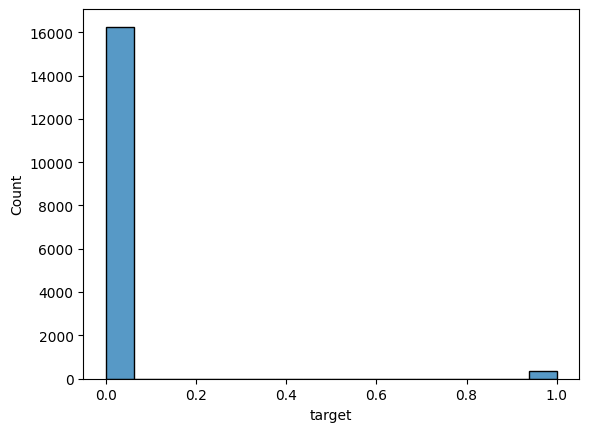

In [7]:
sns.histplot(full_df["target"])

In [8]:
full_df.groupby(["target"]).count()["search_id"]

target
0    16254
1      356
Name: search_id, dtype: int64

Наблюдается дисбаланс в метках для ранжирования.

Наблюдаются дискретные признаки.

In [9]:
# недискретные признаки
nondisc = full_df.nunique()[full_df.nunique() > 20].index.to_list()

/var/folders/nm/_vhgd_nn6_q6j0v7y5gyx2p40000gn/T/ipykernel_38784/3330376971.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


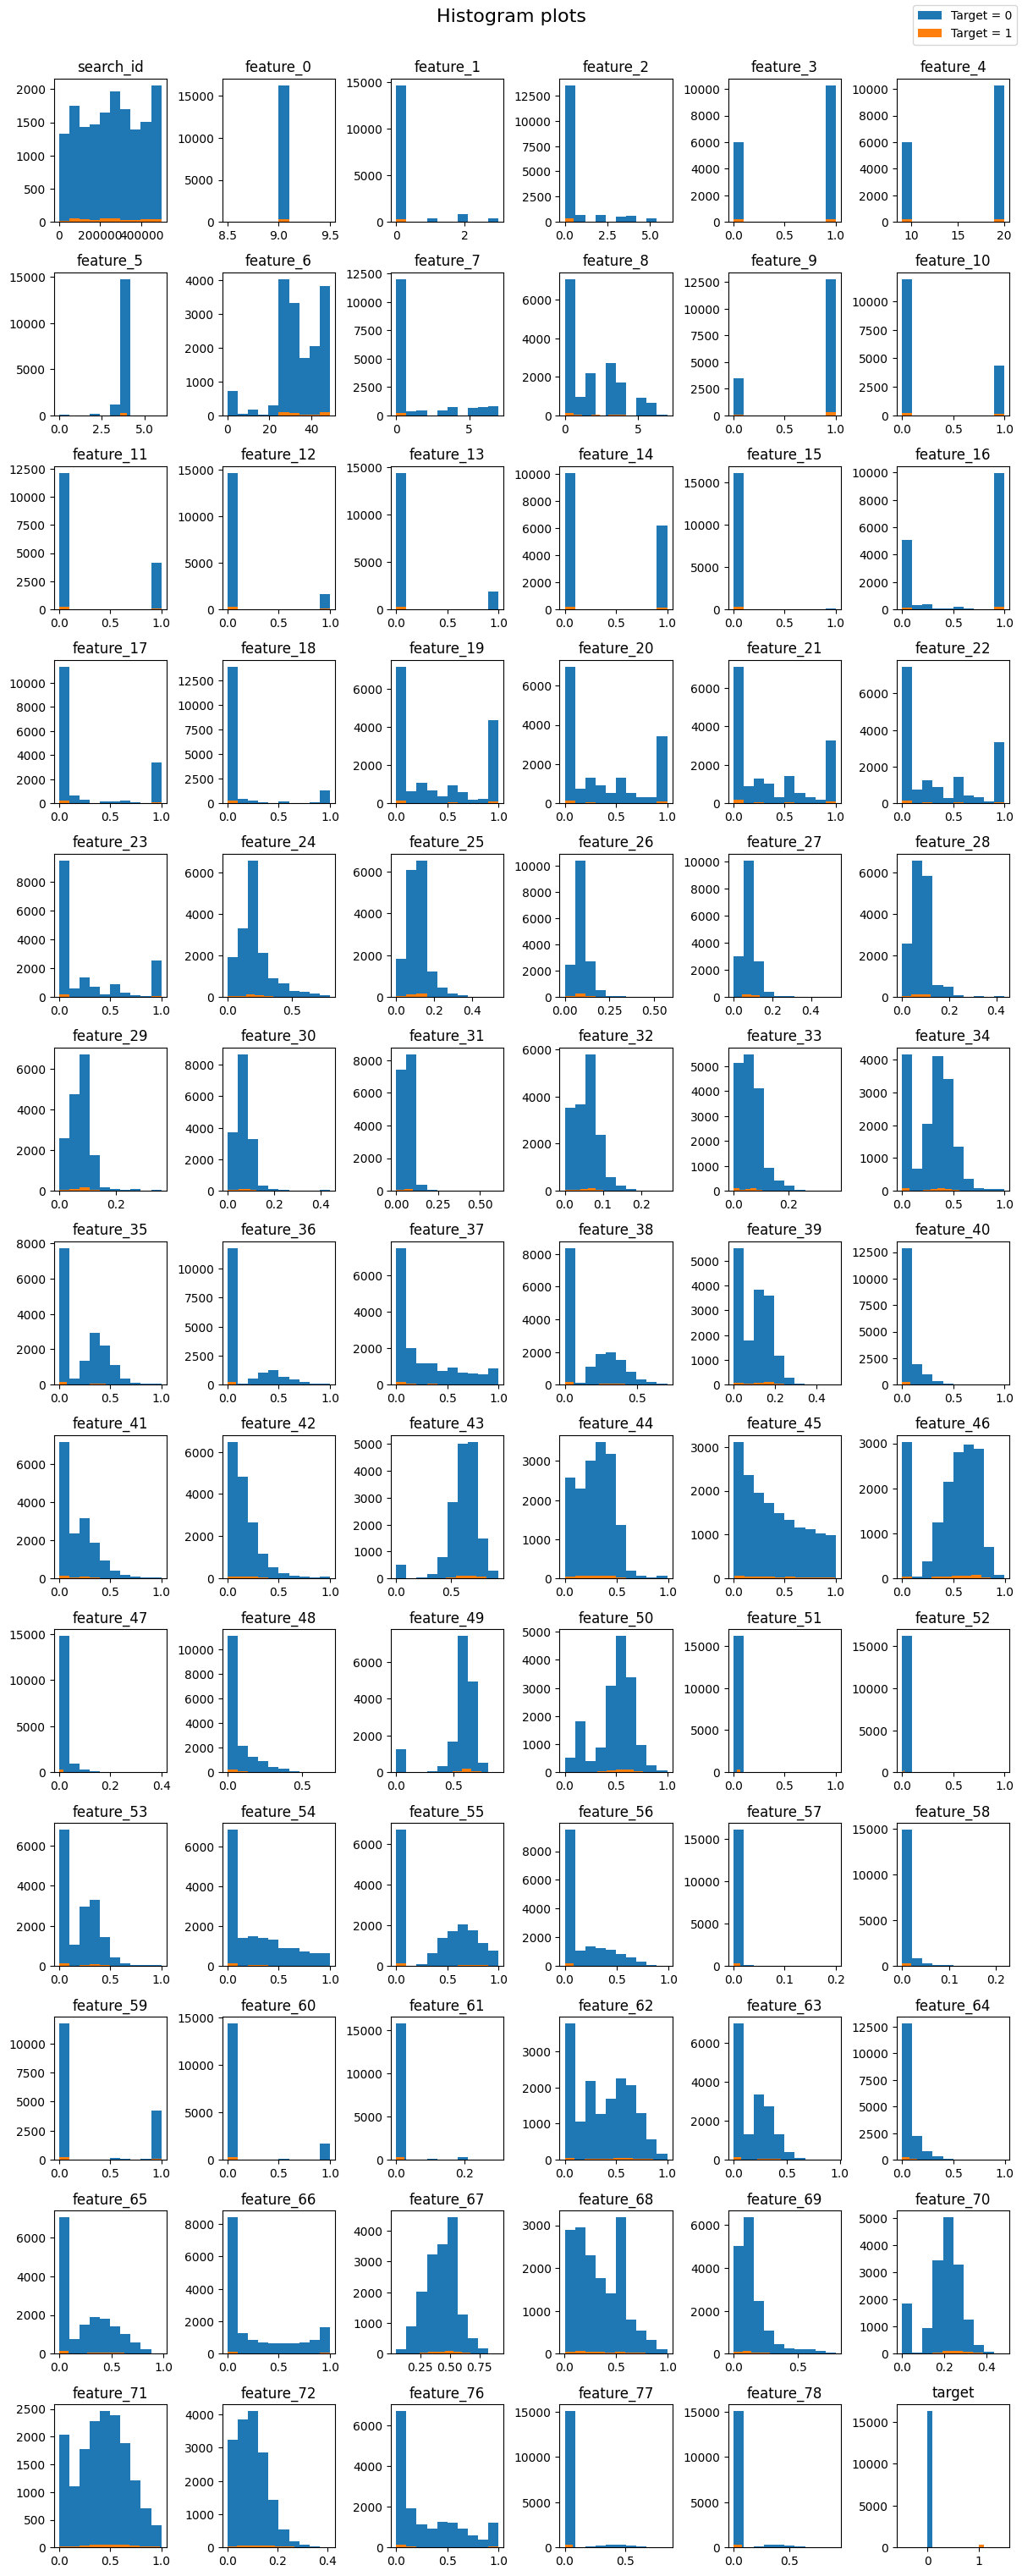

In [29]:
ncols = 6
fig, axes = plt.subplots(full_df.shape[1] // ncols, ncols, figsize=(ncols * 2, 30))

fig.suptitle('Histogram plots', fontsize=16, y=1.01)

for i in range(len(axes)):
    for j in range(len(axes[i])):
        axes[i][j].hist(full_df[full_df["target"] == 0][full_df.columns[i * ncols + j]])
        axes[i][j].hist(full_df[full_df["target"] == 1][full_df.columns[i * ncols + j]])
        axes[i][j].set_title(full_df.columns[i * ncols + j])

fig.legend(["Target = 0", "Target = 1"], loc='upper right')
fig.tight_layout(pad=0.4, w_pad=0.2, h_pad=1.0)
fig.show()